<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5703 non-null   datetime64[ns]
 1   Open    5703 non-null   float64       
 2   High    5703 non-null   float64       
 3   Low     5703 non-null   float64       
 4   Close   5703 non-null   float64       
 5   Volume  5703 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 267.5 KB
None
                                Date         Open         High          Low  \
count                           5703  5703.000000  5703.000000  5703.000000   
mean   2011-05-10 13:12:05.302472448  1040.382816  1048.339181  1031.863169   
min              2000-01-04 00:00:00   256.600000   259.400000   255.100000   
25%              2005-09-19 12:00:00   459.850000   463.900000   457.450000   
50%              2011-05-10 00:00:00  1188.800000  1198.000000  1179.70

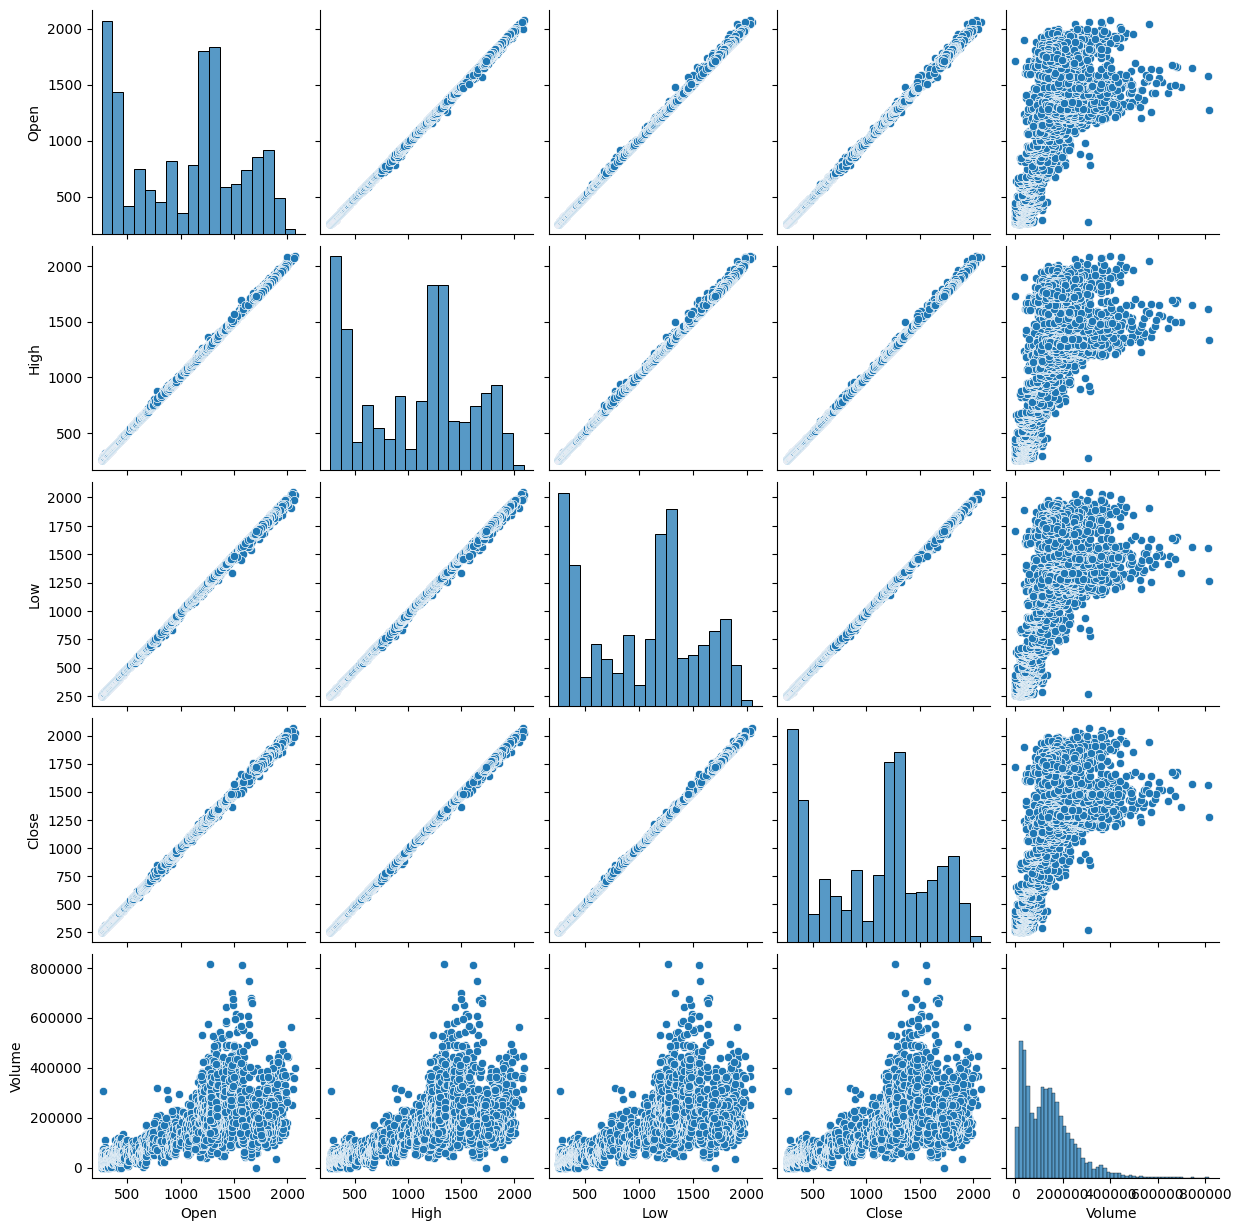

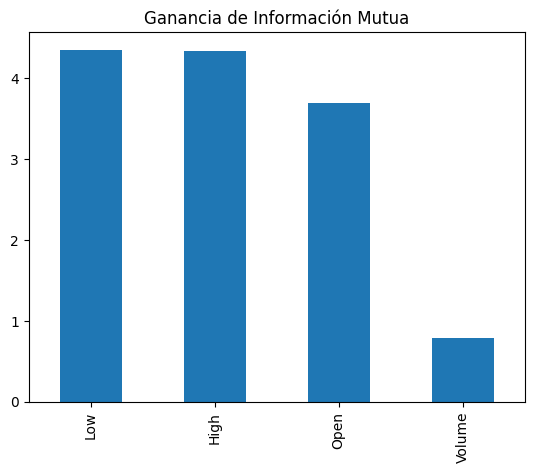

In [3]:
# Feature Pipeline Notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# 1. Cargar los datos
df = pd.read_csv("C:/Users/megag/Documents/Curso IA/Curso Avanzado/Machine Learning Regresion/gold.csv")  # Cambiar la ruta del archivo

# 2. Convertir 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst= True)

# 3. Visualización general (EDA)
print(df.info())
print(df.describe())

# 4. Visualización de las variables numéricas
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

# 5. Ganancia de Información Mutua
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Calcular la ganancia de información mutua
mi = mutual_info_regression(X, y)
mi = pd.Series(mi, index=X.columns)
mi.sort_values(ascending=False).plot.bar()
plt.title("Ganancia de Información Mutua")
plt.show()

# 6. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Guardar los datos procesados y el escalador
import pickle
pickle.dump((X_train_scaled, X_test_scaled, y_train, y_test), open("processed_data.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
